# Module 3.03 - Statistical Hypothesis testing

In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Statistical Hypothesis Testing

### Definitions

- **Hypothesis** = Idea that has yet to be proven: statement regarding the numeric value of a population parameter  
- **Hypothesis Test** = verification of a statement about the values of one or multiple population parameters
- **Null Hypothesis $H_0$** Base hypothesis, we start with assuming it is true.
- **Alternative Hypothesis ($H_1$, $H_a$)** Conclusion if the null hypothesis is unlikely to be true; what you would turn to if you felt there was convincing evidence that $H_0$ was not true.  
- **Critical region** or **rejection region** = The region of values rejecting the null hypothesis. It is is the collection of all values of the test statistic for which we can reject the null hypothesis.
- **Acceptance region** = The region of values supporting the null hypothesis.  
- **Critical value g** = Boundary of the critical region  
- **Significance Level** = The probability of rejecting a true null hypothesis $H_0$.

The principle of **hypothesis testing** is to calculate how likely it is to observe the **test statistic** (the statistic calculated from the observations) if you assume that the null hypothesis $H_0$ is true. If the probability of observing the test statistic is very low, i.e. if the test statistic lies in the most extreme part of the probability distribution (called the **critical region**) you conclude that the null hypothesis is unlikely to be true and you reject it in favour of the alternative hypothesis $H_1$.

All other values lie in the **acceptance region** of the test. The probability of this happening when $H_0$ is actually true is called the size of the test. 5% is often used as the common default size.

Take care in the language that you use!

- If you accept $H_0$, never say that this is because the evidence supports it. You can only conclude there is not significant evidence against $H_0$.
- If you reject $H_0$, say that there is evidence that the Null Hypothesis is not true.

All statistical hypothesis tests follow the same testing procedure:

1. Formulate both hypotheses ($H_0$ and $𝐻_1$)
2. Determine the significance level ($\alpha$)
3. Calculate the test statistic form the smaple
4. Determine the critical region or the probability value
5. Draw conclusions

## The z-test

The $z$-test is used to confirm or refute an assumption about the (unknown) *population mean*, based on a sufficiently large sample.

### The right-tailed $z$-test

Jars of jam are filled by a machine. It has been found that the quantity of jam in a jar is normally distributed and has mean 351.2g, with standard deviation 4.1g. It is believed that the settings of the mean amount on the machine might have been altered accidentally. Assume that the standard deviation has not been altered.

To test this a random sample of 40 jars is taken and the mean quantity per jar is calculated. The mean quantity per jar is found to be 352.8g.

Let's first plot the situation:

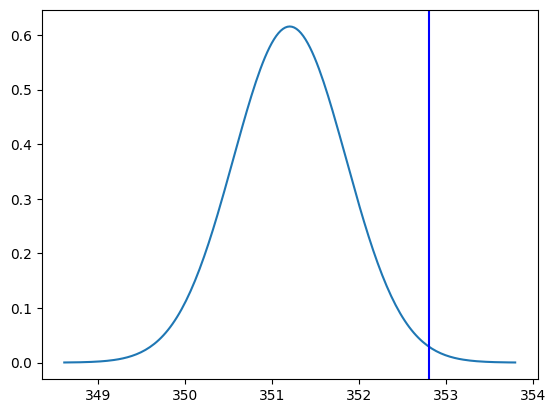

In [3]:
# Properties of the sample:
n = 40              # Sample size
mu = 351.2          # (Hypothetical) population mean 
sigma = 4.1         # Population standard deviation (assumed to be known)
m_sample = 352.8    # Sample mean
s_sample = sigma / math.sqrt(n)

# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of x
# plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= x), color='lightblue')
# Show the mean with an orange line
plt.axvline(m_sample, color="blue");

The testing procedure then runs as follows:

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 351.2$ (the machine is working correctly)
- $H_1: \mu > 351.2$ (the machine is not working correctly)

**Step 2.** Choose a significance level, e.g. $\alpha = 0.05$

**Step 3.** Determine the value of the test statistic, in this case $\overline{x} = 352.8$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.


In [4]:
alpha = 0.05 # Significance level chosen by the researcher
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

p-value: 0.00679
p < alpha: reject H0


An alternative method is to determine the critical region, i.e. the set of all values for the sample mean where $H_0$ may be rejected. The boundary of that area is called the critical value $g$. To the left of it you can't reject $H_0$ (acceptance region), to the right you can (critical region). The area of the acceptance region is $1 - \alpha$, the area of the critical region is $\alpha$.

In [6]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(alpha, loc=mu, scale=sigma / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 352.266
sample mean = 352.800 > g = 352.266: reject H0


A plot of this case:

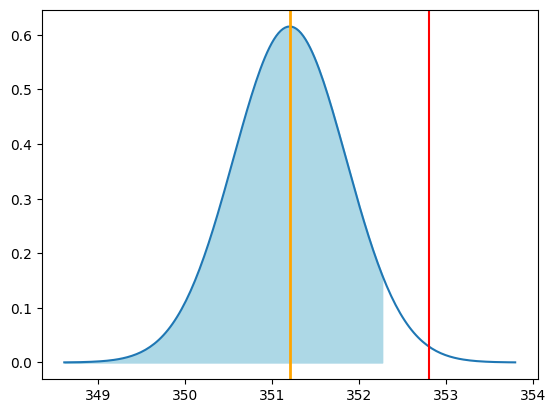

In [8]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue');

## The left-tailed $z$-test

Let's assume the mean quantity per jar is found to be 350.4g. In this case we have reasons to assume that the population mean is *lower* than the value we are testing against ($\mu$ = 351.2g). We can verify this with a *left-tailed* $z$-test.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 351.2$ (the machine is working correctly)
- $H_1: \mu < 351.2$ (the machine is not working correctly)

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

**Step 3.** Calculate the test statistic: $\overline{x} = 350.4$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.

In [9]:
# Properties of the sample:
n = 40              # Sample size
mu = 351.2          # (Hypothetical) population mean 
sigma = 4.1         # Population standard deviation (assumed to be known)
m_sample = 350.4    # Sample mean
alpha = 0.05        # Significance level (chosen by the researcher)

In [10]:
# Pay attention! Use cdf() instead of sf()! Why?
p = stats.norm.cdf(m_sample, loc=mu, scale=sigma/np.sqrt(n)) 

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < a, reject H0")
else:
    print("p > a, do not reject H0")

p-value: 0.10859
p > a, do not reject H0


In this case, the critical value $g$ is left of the mean. On the right of $g$, you may not reject $H_0$ (acceptance region), on the left, you can (critical region).

In [13]:
# Critical value according to the formula in the lecture slides
# g = m0 - stats.norm.isf(a) * s / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(1-alpha, loc=mu, scale=(sigma / np.sqrt(n)))
print("Critical value g ≃ %.3f" % g)
if (m_sample > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 350.134
sample mean = 350.400 > g = 350.134: do not reject H0


A plot of this case:

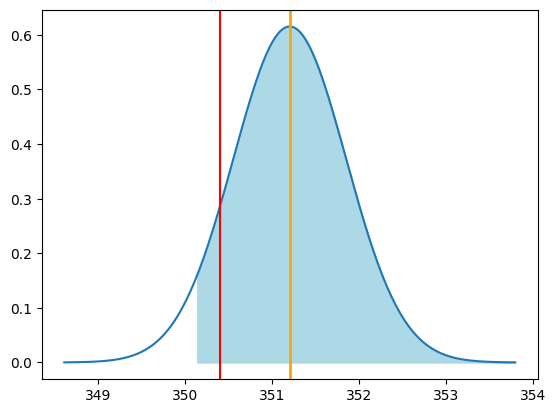

In [15]:
# Gauss-curve:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue');

In this case, we see that the sample mean (in red) still falls within the acceptance region, so we cannot reject the null hypothesis. This is also confirmed by the $p$-value, which is greater than $\alpha$. With this result, there is no reason to assume the machine is not working correctly.

## The two-tailed $z$-test

When we don't want to test whether the population mean is either greater or lower than a hypothetical value, but only want to know if the sample mean is "close enough", we can use a two-tailed $z$-test.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu  =  351.2$
- $H_1: \mu \ne 351.2$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

**Step 3.** Determine the test statistic. Assume the mean quantity per jar is found to be 351.4g. 

$$\overline{x} = 351.4$$

**Step 4.** Calculate the $p$-value and reject $H_0$ if $p < \alpha/2$ (why do we divide by 2?).

In [16]:
# Properties of the sample:
n = 40              # Sample size
mu = 351.2          # (Hypothetical) population mean 
sigma = 4.1         # Population standard deviation (assumed to be known)
m_sample = 351.4    # Sample mean
alpha = 0.05        # Significance level (chosen by the researcher)

In [17]:
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))
print("p-waarde: %.5f" % p)
if(p < alpha/2):
    print("p < alpha/2, reject H0")
else:
    print("p > alpha/2, do not reject H0")

p-waarde: 0.37885
p > alpha/2, do not reject H0


In this case, we have two critical values: $g_1$ on the left of the mean and $g_2$ on the right. The acceptance region still has area $1-\alpha$ and the critical region has area $\alpha$.

In [19]:
g1 = mu - stats.norm.isf(alpha/2) * sigma / np.sqrt(n)
g2 = mu + stats.norm.isf(alpha/2) * sigma / np.sqrt(n)

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < m_sample and m_sample < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % m_sample)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % m_sample)

Acceptance region [g1, g2] ≃ [349.929, 352.471]
Sample mean = 351.400 is inside acceptance region: do not reject H0


A plot of this case:

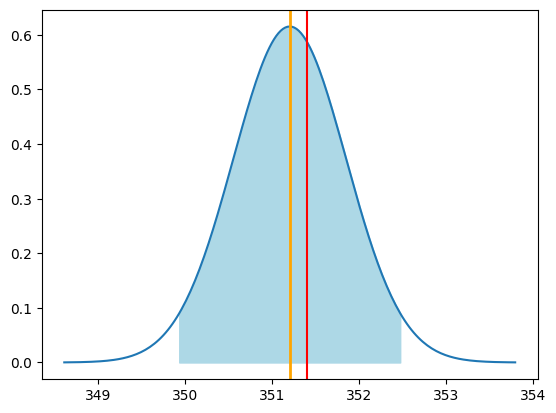

In [21]:
# Gauss-curve
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=mu, scale=sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=mu, scale=sigma/np.sqrt(n))
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue');

**Step 5** Draw conclusions

The obtained sample mean turns out to be sufficiently probable. We cannot rule out a random sampling error. Or, in other words, we *cannot* reject the null hypothesis here. From the sample, we cannot conclude that the machine is not working correctly.

## Student's $t$-test

The $z$-test can only be used under specific conditions:

- The sample needs to be random  
- The sample size needs to be sufficiently large ($n \geq 30$)
- The test statistic needs to have a normal distribution  
- The standard deviation of the population, $\sigma$, is known 

Sometimes these assumptions will not hold and in this case we can not use the $z$-test! If the variable is normally distributed, you can use Student's $t$-test.

The test was named after [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset), who published results of his research under the pseudonym "Student". Gosset worked for the Guinness Brewery in Dublin, Ireland, and was interested in the problems of small samples - for example, the chemical properties of barley. He developed the $t$-test to work with small samples. Guinness did not want to reveal its trade secrets, so Gosset had to publish his work under a pseudonym.

### Example

The pulse of healthy young adults can be modelled by a normal distribution with mean 80 and standard deviation 9. It is thought that trained athletes may have lower pulse rates than usual.

A random sample of 12 trained athletes is taken and their pulses are recorded: 48, 52, 59, 45, 57, 52, 44, 58, 56, 44, 63, 50.

Test at the 5% level of significance whether trained athletes have lower pulse rates than normal healthy young adults.

This is a *left-tailed* test, because we are testing whether the pulse rates of trained athletes are lower than those of healthy young adults. The testing procedure then runs as follows:

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 80$ (the pulse rates of trained athletes are the same as those of healthy young adults)
- $H_1: \mu < 80$ (the pulse rates of trained athletes are lower than those of healthy young adults)

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

**Step 3.** Calculate the test statistic $\overline{x}$

In [33]:
pulses = [48, 52, 59, 45, 57, 52, 44, 58, 56, 44, 63, 50]
n = len(pulses)
mu = 80
s = 9
m_sample = np.mean(pulses)
s_sample = np.std(pulses,ddof=1)
alpha = 0.05

print(f"Sample mean: {m_sample}")

Sample mean: 52.333333333333336


**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.

In [34]:
p = stats.t.cdf(m_sample, loc = mu, scale = s_sample / math.sqrt(n), df = n - 1)
print(f"p-value: {p}")
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

p-value: 5.283891352937751e-09
p < alpha: reject H0


Or calculate the critical value $g$ and reject $H_0$ if $\overline{x} < g$.

In [35]:
g = stats.t.isf(1-alpha, loc = mu, scale = s_sample / math.sqrt(n), df = n - 1)
print("Critical value g ≃ %.3f" % g)
if (m_sample > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (m_sample, g))


Critical value g ≃ 76.711
sample mean = 52.333 < g = 76.711: reject H0


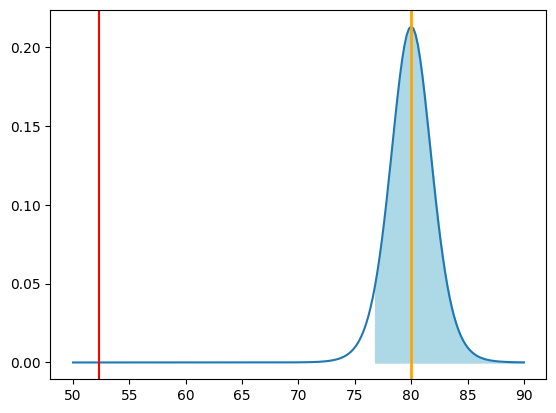

In [40]:
# Gauss-curve
# X-values
dist_x = np.linspace(50, 90, num=201)
# Y-values
dist_y = stats.t.pdf(dist_x, loc=mu, scale=s_sample/np.sqrt(n), df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue');

**Step 5** Draw conclusions.

The pulse rate of the trained athletes is well outside of the acceptance region and the $p$-value is very low. No matter what reasonable value we would have chosen for $\alpha$, the $p$-value is lower still. Therefore, we can reject the null hypothesis and conclude that in this sample, there is evidence to conclude that the pulse rates of trained athletes are indeed lower than those of typical healthy young adults.

### Use of the function `ttest_1samp`


SciPy provides a function `ttest_1samp()` that allows you to perform a *two-tailed* t-test on a collection of observations:

In [43]:
pulses = [48, 52, 59, 45, 57, 52, 44, 58, 56, 44, 63, 50]
alpha = 0.05
mu = 80

t_stat, p_val = stats.ttest_1samp(a=pulses, popmean=mu, alternative='less')
print("Sample mean        : %.3f" % np.mean(pulses))
print("t-score            : %.3f" % t_stat)
print(f"p-value           : {p_val}")

Sample mean        : 52.333
t-score            : -15.108
p-value (2-tailed) : 5.283891352937751e-09


The results are identical to the ones we obtained earlier!

Remark that there is no similar function for the $z$-test. In practice, the $z$-test is rarely used because the conditions for its use are rarely met. In particular, we the assumption that the population variance is known is not realistic. The $t$-test is more versatile and can be used in a wider range of situations.

## Errors in Hypothesis Tests

**Type I error** (false positive)  
The null hypothesis is actually true and you reject it.  

**Type II error** (false negative)    
You accept the null hypothesis and it was not true 


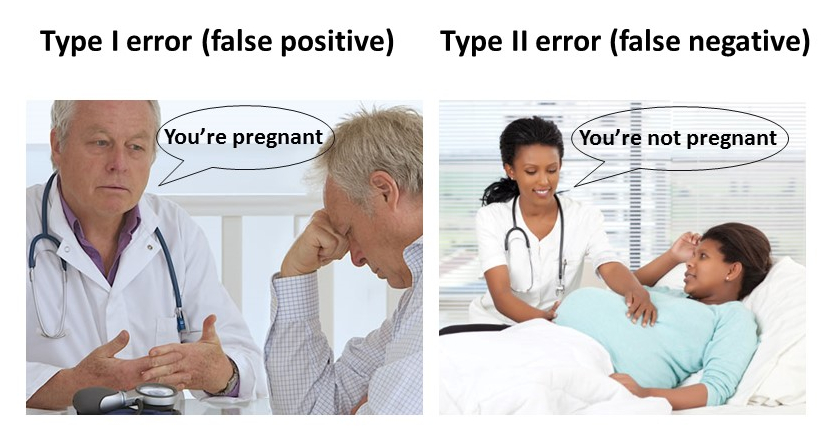


P(type I error) = 𝛼 (= significance level)  
P(type II error) = 𝛽  
Calculating 𝛽 is not trivial, but if 𝛼 ↘ then 𝛽 ↗